## Trends in the Data pulled on April 5th, 2019
* Temperatures peak in cities located around 0 to 20 degrees latitude, and temperatures continually decrease as you move farther away from that latitude range
* It could be interesting to examine the same data during a the opposite time of year to see if the tilt of the earth has any impact on temp/latitude correlation
* The average temperature of the cities is 59 F, the average wind speed is 8 MPH, the average humidity is 72%, and the average cloud coverage is 41%
* Cloud coverage, wind speed, and humidity levels are all reletively unaffected by the latitude of the city

In [219]:
#import dependencies
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from api_keys import api_key

In [220]:
#generate list of random cities
lat_range = [-90, 90]
lng_range = [-180, 180]
lat_lngs = []
cities = []

In [221]:
lat = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1400)
lng = np.random.uniform(low=lng_range[0], high=lng_range[1], size = 1400)

In [222]:
lat_lngs = list(zip(lat,lng))
len(lat_lngs)

1400

In [223]:
for item in lat_lngs:
    city_name = citipy.nearest_city(item[0], item[1]).city_name
    if city_name not in cities:
        cities.append(city_name)

In [224]:
len(cities)

596

In [225]:
#prep for api call
appid = api_key
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={appid}&units=imperial&q="
log_data = []
weather_in_city = []

In [226]:
#call the api and request weather for each city and print log info
for city in cities:
    response = requests.get(f"{base_url}{city}").json()
    log_info = f"Request number {cities.index(city)} for city {city} complete. Status {response['cod']}"
    log_data.append(log_info)
    print(log_info)
    weather_in_city.append(response)

Request number 0 for city tilichiki complete. Status 200
Request number 1 for city faanui complete. Status 200
Request number 2 for city meyungs complete. Status 404
Request number 3 for city qaanaaq complete. Status 200
Request number 4 for city puri complete. Status 200
Request number 5 for city vaini complete. Status 200
Request number 6 for city bluff complete. Status 200
Request number 7 for city ushuaia complete. Status 200
Request number 8 for city esperance complete. Status 200
Request number 9 for city luganville complete. Status 200
Request number 10 for city oranjemund complete. Status 200
Request number 11 for city upernavik complete. Status 200
Request number 12 for city bethel complete. Status 200
Request number 13 for city nizhneyansk complete. Status 404
Request number 14 for city hobyo complete. Status 200
Request number 15 for city castro complete. Status 200
Request number 16 for city beloha complete. Status 200
Request number 17 for city muros complete. Status 200
R

Request number 144 for city mar del plata complete. Status 200
Request number 145 for city clyde river complete. Status 200
Request number 146 for city satitoa complete. Status 404
Request number 147 for city roald complete. Status 200
Request number 148 for city adrar complete. Status 200
Request number 149 for city barentsburg complete. Status 404
Request number 150 for city saleaula complete. Status 404
Request number 151 for city amderma complete. Status 404
Request number 152 for city gambela complete. Status 200
Request number 153 for city mahebourg complete. Status 200
Request number 154 for city klyuchi complete. Status 200
Request number 155 for city tono complete. Status 200
Request number 156 for city guerrero negro complete. Status 200
Request number 157 for city chiredzi complete. Status 200
Request number 158 for city antofagasta complete. Status 200
Request number 159 for city husavik complete. Status 200
Request number 160 for city vanimo complete. Status 200
Request nu

Request number 286 for city nanakuli complete. Status 200
Request number 287 for city bingol complete. Status 200
Request number 288 for city tiksi complete. Status 200
Request number 289 for city zhirnovsk complete. Status 200
Request number 290 for city lerwick complete. Status 200
Request number 291 for city jacqueville complete. Status 200
Request number 292 for city amalapuram complete. Status 200
Request number 293 for city duz complete. Status 404
Request number 294 for city dabat complete. Status 200
Request number 295 for city sambava complete. Status 200
Request number 296 for city corrente complete. Status 200
Request number 297 for city atka complete. Status 404
Request number 298 for city trybukhivtsi complete. Status 200
Request number 299 for city mairang complete. Status 200
Request number 300 for city khorixas complete. Status 200
Request number 301 for city pemba complete. Status 200
Request number 302 for city okha complete. Status 200
Request number 303 for city meu

Request number 428 for city jeremie complete. Status 200
Request number 429 for city hamilton complete. Status 200
Request number 430 for city perehonivka complete. Status 200
Request number 431 for city midland complete. Status 200
Request number 432 for city lavrentiya complete. Status 200
Request number 433 for city hambantota complete. Status 200
Request number 434 for city lorengau complete. Status 200
Request number 435 for city kabinda complete. Status 200
Request number 436 for city revelstoke complete. Status 200
Request number 437 for city eraclea complete. Status 200
Request number 438 for city aflu complete. Status 404
Request number 439 for city deh rawud complete. Status 404
Request number 440 for city vostok complete. Status 200
Request number 441 for city zabol complete. Status 200
Request number 442 for city poum complete. Status 200
Request number 443 for city ajaccio complete. Status 200
Request number 444 for city mullaitivu complete. Status 404
Request number 445 f

Request number 570 for city riyaq complete. Status 404
Request number 571 for city bermeo complete. Status 200
Request number 572 for city great yarmouth complete. Status 200
Request number 573 for city sitio novo do tocantins complete. Status 404
Request number 574 for city sioux lookout complete. Status 200
Request number 575 for city okhotsk complete. Status 200
Request number 576 for city sharjah complete. Status 200
Request number 577 for city mukhen complete. Status 200
Request number 578 for city svetlyy complete. Status 404
Request number 579 for city gao complete. Status 200
Request number 580 for city sorokino complete. Status 200
Request number 581 for city chuguyevka complete. Status 200
Request number 582 for city la paz complete. Status 200
Request number 583 for city tabas complete. Status 200
Request number 584 for city turayf complete. Status 200
Request number 585 for city bogorodskoye complete. Status 200
Request number 586 for city burica complete. Status 404
Reques

In [227]:
len(weather_in_city)

596

In [228]:
#gather city name, country name, latitude, temp, humidity, wind, and cloudiness data
unique_cities = []
temp = []
humidity = []
wind = []
cloud = []
plt_lat = []
country = []
for city_data in weather_in_city:
    if city_data["cod"] == 200:
        unique_cities.append(city_data["name"])
        temp.append(city_data["main"]["temp"])
        humidity.append(city_data["main"]["humidity"])
        wind.append(city_data["wind"]["speed"])
        cloud.append(city_data["clouds"]["all"])
        plt_lat.append(city_data["coord"]["lat"])
        country.append(city_data["sys"]["country"])

In [229]:
len(unique_cities)

526

In [230]:
relevant_weather_data = {"City": unique_cities, 
                          "Country": country, 
                          "Latitude": plt_lat, 
                          "Temp (F)": temp, 
                          "% Humidity": humidity,
                          "Wind (MPH)": wind,
                          "% Clouds": cloud}
weather_dataframe = pd.DataFrame.from_dict(relevant_weather_data, orient="columns")
weather_dataframe.head()

,City,Country,Latitude,Temp (F),% Humidity,Wind (MPH),% Clouds
0,Tilichiki,RU,60.47,16.52,65,2.39,0
1,Faanui,PF,-16.48,84.02,100,14.81,64
2,Qaanaaq,GL,77.48,5.72,88,9.66,36
3,Puri,ID,-7.54,77.00,100,4.70,20
4,Vaini,IN,15.34,71.96,86,2.62,8


In [231]:
weather_dataframe.mean()

City            (1.18449062818627e-309+8.883968562073e-310j)
Country       (3.21522995317757e-309+3.55360033501844e-309j)
Latitude       (8.461244415645e-311+3.892024939157705e-309j)
Temp (F)      (1.43840267518888e-309+1.69221338175826e-309j)
% Humidity                            (71.54182509505704+0j)
Wind (MPH)                            (8.359866920152077+0j)
% Clouds                               (40.2319391634981+0j)
dtype: complex128

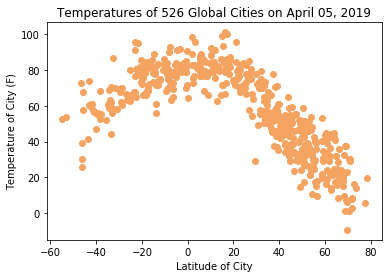

In [232]:
#plot temp, humidity, cloudiness, and wind speed against latitude
plt.scatter(plt_lat, temp, color="sandybrown")
plt.title(f"Temperatures of {len(temp)} Global Cities on {'{:%B %d, %Y}'.format(datetime.datetime.now())}")
plt.ylabel("Temperature of City (F)")
plt.xlabel("Latitude of City")
plt.savefig("City Temp by Latitude.png")
plt.show()

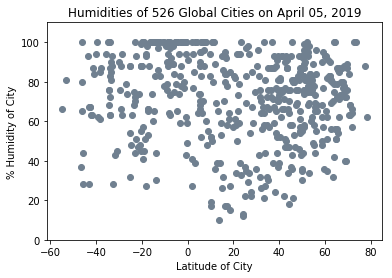

In [233]:
plt.scatter(plt_lat, humidity, color="slategray")
plt.ylim(0, 110)
plt.title(f"Humidities of {len(temp)} Global Cities on {'{:%B %d, %Y}'.format(datetime.datetime.now())}")
plt.ylabel("% Humidity of City")
plt.xlabel("Latitude of City")
plt.savefig("City Humidity by Latitude.png")
plt.show()

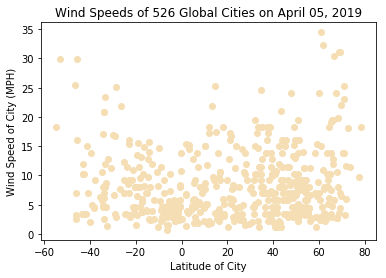

In [234]:
plt.scatter(plt_lat, wind, color="wheat")
plt.title(f"Wind Speeds of {len(temp)} Global Cities on {'{:%B %d, %Y}'.format(datetime.datetime.now())}")
plt.ylabel("Wind Speed of City (MPH)")
plt.xlabel("Latitude of City")
plt.savefig("City Wind Speed by Latitude.png")
plt.show()

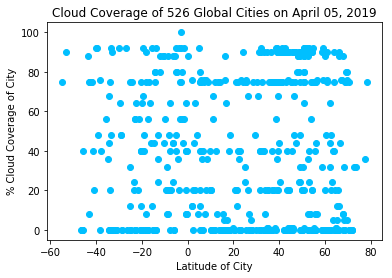

In [235]:
plt.scatter(plt_lat, cloud, color="deepskyblue")
plt.title(f"Cloud Coverage of {len(temp)} Global Cities on {'{:%B %d, %Y}'.format(datetime.datetime.now())}")
plt.ylabel("% Cloud Coverage of City")
plt.xlabel("Latitude of City")
plt.savefig("City Cloud Coverage by Latitude.png")
plt.show()

In [236]:
#save data (log data, relevant data, and total api response data) into csvs
import csv
with open("random_city_weather_log.csv", "w", newline="") as csvfile:
    filewriter = csv.writer(csvfile, delimiter=",", lineterminator="\n")
    for item in log_data:
        filewriter.writerow([log_data[log_data.index(item)]])
        
weather_dataframe.to_csv("random_city_weather_total_data.csv")

total_api_response_df = pd.DataFrame(weather_in_city)
total_api_response_df.to_csv("total_api_response_data.csv")